<a href="https://colab.research.google.com/github/Vivalkar/Machine_Learning/blob/main/Semester_Long_project_CS535_Image_Generation_using_probablistic_Diffusion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
Lata Sagnali(lsagnal1@binghamton.edu) Snehal Jadhav(sjadhav7@binghamton.edu) Prachi Vivalkar(pvivalk1@binghamton.edu)

**Project description** This project aimed at Image Generation with Probablistic Diffusion Models using DDPM,DDIM and FastDPM

Diffusion models are inspired by non-equilibrium thermodynamics. They define a Markov chain of diffusion steps to slowly add random noise to data and then learn to reverse the diffusion process to construct desired data samples from the noise. Unlike VAE or flow models, diffusion models are learned with a fixed procedure and the latent variable has high dimensionality (same as the original data).


# **PROBLEM 1**
**DENOISING DIFFUSION PROBABILISTIC MODELS**
Problem they aim to solve: Although diffusion models are straightforward to define and train, there is no evidence that they can produce high-quality samples. 
The goal of this study is to show that diffusion models can generate high-quality samples, which can help amplify whatever effects that generative models have had (or will have) on the larger world.

**DENOISING DIFFUSION IMPLICIT MODELS**
Problem they aim to solve: A critical drawback of most models is that they require many iterations to produce a high-quality sample. 
For DDPMs, this is because that the generative process (from noise to data) approximates the reverse of the forward diffusion process (from data to noise), which could have thousands of steps; iterating over all the steps is required to produce a single sample, which is much slower compared to GANs, which only needs one pass through a network. 
This becomes more problematic for larger images as sampling 50k images of size 256 × 256 could take nearly 1000 hours on the same GPU. 
The goal of this study is to accelerate sampling, by presenting denoising diffusion implicit models (DDIMs), a more efficient class of iterative implicit probabilistic models with the same training procedure as DDPMs.

What makes the problem important: Sharing data with partners or releasing data to the public is common in the big data era. 
In order to protect those who were eager to contribute information, privacy should be a key focus in the process. 
Various privacy approaches have been created to protect against re-identification attacks. 
By associating some set of qualities, a re-identification attack for an individual (or a group of people) can be carried out.
QIDs are a collection of attributes such as ZIP code, birthday, gender, and so on. Many privacy-preserving strategies aim to modify QIDs such that they 
can't be linked together to identify a specific person, which takes a long time in most cases. Long before software tools were accessible, false photographs were generated manually. 
Recent breakthroughs in Machine Learning and Artificial Intelligence have made it a lot easier to produce and synthesize digital modifications in images and videos, while advances in technology have also made it easier to discern the difference between fake and real images while generating the fake images takes longer to sample, advance in technology has given a big update in that line.



# **PROBLEM 2:**
**DENOISING DIFFUSION PROBABILISTIC MODELS**

Model :diffusion models: are inspired by non-equilibrium thermodynamics. They define a Markov chain of diffusion steps to slowly add random noise to data and then learn to reverse the diffusion process to construct desired data samples from the noise.         

Theorem :
Forward process: is the process in which we add small amount of Gaussian noise to the sample in T steps, producing a sequence of noisy samples
Reverse process: If we can reverse the above process and sample, we will be able to recreate the true sample from a Gaussian noise input.
Reverse process decoder: This ensures that the neural network reverse process operates on consistently scaled inputs starting from the standard normal prior, to obtain discrete log likelihoods. 

Important: In particular, the diffusion process setup causes the simplified objective to down-weight loss terms corresponding to small t. These in return train the network to denoise data with very small amounts of noise, so it is beneficial to down-weight them so that the network can focus on more difficult denoising tasks at larger t terms. Which leads to better sample quality 

Difference :
What distinguishes diffusion models from other types of latent variable models is that the approximate posterior, called the forward process or diffusion process, is fixed to a Markov chain that gradually adds Gaussian noise to the data according to a variance schedule
Diffusion models rely on a long Markov chain of diffusion steps to generate samples, so it can be quite expensive in terms of time and compute.


**DENOISING DIFFUSION IMPLICIT MODELS**

Model: implicit generative model: they only specify a stochastic procedure with which to generate data and relate these ideas to modelling problems in related fields

Theorem: Theorem 1, the optimal solution of Jσ is also the same as that of L1. Therefore, if parameters are not shared across t in the model Eθ, then the L1 of another objective can be used 

Important: is able to generate high quality samples much more efficiently with the ability to perform meaningful interpolations from the latent space. 

Difference: 
Generate higher-quality samples using a much fewer number of steps.
Have “consistency” property since the generative process is deterministic, meaning that multiple samples conditioned on the same latent variable should have similar high-level features.
Because of the consistency, DDIM can do semantically meaningful interpolation in the latent variable.


**FAST SAMPLING ON DIFFUSION PROBABILISTIC MODELS**

Model: diffusion models: are inspired by non-equilibrium thermodynamics. They define a Markov chain of diffusion steps to slowly add random noise to data and then learn to reverse the diffusion process to construct desired data samples from the noise.
This is a framework for faster sampling in diffusion generative models without model retraining. The method is approximating pretrained Denoising Diffusion Probabilistic Model via shorter diffusion and reverse processes. The idea is based on generalizing discrete diffusion steps to continuous diffusion steps and providing an invertible mapping between diffusion steps and noise levels. They compare the proposed approximations to diffusion processes on a range of image generation tasks.

Theorem: Forward noising process: which produces latent adding Gaussian noise at time t with variance.

Important: The learning variances of the reverse diffusion process allows sampling with an order of magnitude fewer forward passes with a negligible difference in sample quality, which is important for the practical deployment of these models.

Difference: 
The use of precision and recall
To more tightly optimize the variational lower-bound (VLB), we learn the reverse process variances using a simple reparameterization and a hybrid learning objective that combines the VLB
The models obtain better log-likelihoods than all other models



In [ ]:
!pip install mpdl

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from tqdm.autonotebook import tqdm

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/MPDL/')

from mpdl import train_network, Flatten, View, weight_reset

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class View(nn.Module):
    def __init__(self, *shape):
        super(View, self).__init__()
        self.shape = shape
    def forward(self, input):
        return input.view(*self.shape) 

def moveTo(obj, device):
    if isinstance(obj, tuple):
        return tuple([moveTo(x, device) for x in obj])
    elif isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, torch.Tensor):
        return obj.to(device)
    else:
        return x        

def train_network(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                         epochs=50, device="cpu", checkpoint_file=None, 
                         lr_schedule=None, optimizer=None, disable_tqdm=False
                        ):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    """
    if score_funcs == None:
        score_funcs = {}#Empty set 
    
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []

        
    if optimizer == None:
        #The AdamW optimizer is a good default optimizer
        optimizer = torch.optim.AdamW(model.parameters())
        del_opt = True
    else:
        del_opt = False

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch", disable=disable_tqdm):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False, disable=disable_tqdm):
      
            #Move the batch to the device we are using. 
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)
            
            batch_size = labels.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            y_hat = model(inputs) #this just computed f_Θ(x(i))

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * batch_size
            
            if len(score_funcs) > 0:
                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if len(y_pred.shape) == 2 and y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            val_running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                batch_size = labels.shape[0]
        
                y_hat = model(inputs)
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                val_running_loss += loss.item() * batch_size

                if len(score_funcs) > 0:
                    #moving labels & predictions back to CPU for computing / storing predictions
                    labels = labels.detach().cpu().numpy()
                    y_hat = y_hat.detach().cpu().numpy()
                    for i in range(batch_size):
                        y_true.append(labels[i])
                        y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if len(y_pred.shape) == 2 and y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
        
        #In PyTorch, the convention is to update the learning rate after every epoch
        if not lr_schedule is None:
            if isinstance(lr_schedule, torch.optim.lr_scheduler.ReduceLROnPlateau):
                lr_schedule.step(val_running_loss)
            else:
                lr_schedule.step()
        
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)
    if del_opt:
        del optimizer

    return pd.DataFrame.from_dict(results)

**1) Build a Denoising on the MNIST dataset.**


**Creating DataLoader for MNIST Dataset** 

In [ ]:
class AutoEncodeDataset(Dataset):
    """Takes a dataset with (x, y) label pairs and converts it to (x, x) pairs. 
    This makes it easy to re-use other code"""

    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset.__getitem__(idx)
        return x, x

In [ ]:
train_data = AutoEncodeDataset(torchvision.datasets.MNIST("./", train=True, transform=transforms.ToTensor(), download=True))
test_data_xy = torchvision.datasets.MNIST("./", train=False, transform=transforms.ToTensor(), download=True)
test_data_xx = AutoEncodeDataset(test_data_xy)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data_xx, batch_size=128)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [ ]:
normal = torch.distributions.Normal(0, 0.5)

def addNoise(x, device='cpu'): 
    """
    We will use this helper function to add noise to some data. 
    x: the data we want to add noise to
    device: the CPU or GPU that the input is located on. 
    """
    return x + normal.sample(sample_shape=torch.Size(x.shape)).to(device)

In [ ]:
class AdditiveGausNoise(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        #every PyTorch Module object has a self.training boolean which can be used 
        #to check if we are in training (True) or evaluation (False) mode. 
        if self.training:
             return addNoise(x, device=device)
        else:
            return x

In [ ]:
def showEncodeDecode(encode_decode, x):
    encode_decode = encode_decode.cpu()
    with torch.no_grad():
        x_recon = encode_decode(x.cpu())

    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(x.numpy()[0,:])
    axarr[1].imshow(x_recon.numpy()[0,0,:])

In [ ]:
#How many values are in the input? We use this to help determine the size of subsequent layers
D = 28*28 #28 * 28 images 
#How many channels are in the input?
C = 1
#How many classes are there?
classes = 10

**Denoising Auto Encoder**

In [ ]:
dnauto_encoder_conv_big = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 2, (3,3), padding=1), # 1 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1) # 2 * 28 *28 to 2 * 28 *28
)


dnauto_decoder_conv_big = nn.Sequential(
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, C, (3,3),padding=1)# 2 * 28 *28  to 1 * 28 * 28
)

dnauto_encode_decode_conv_big = nn.Sequential(
    dnauto_encoder_conv_big,
    dnauto_decoder_conv_big
)

In [ ]:
mse_loss = nn.MSELoss()

In [ ]:
train_network(dnauto_encode_decode_conv_big, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,8.290237,1997.267189,1997.267189
1,1,16.202474,938.603867,938.603867
2,2,24.194166,826.170278,826.170278
3,3,32.336195,792.602086,792.602086
4,4,40.201546,778.803896,778.803896
5,5,48.125514,768.772367,768.772367
6,6,56.078937,762.531553,762.531553
7,7,63.986769,755.370849,755.370849
8,8,71.921380,749.206306,749.206306
9,9,79.906724,748.090348,748.090348


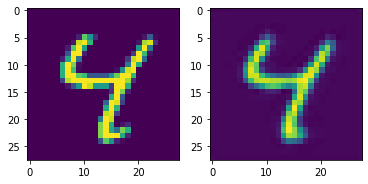

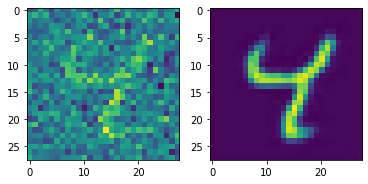

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_big, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_big, addNoise(test_data_xy[6][0]))

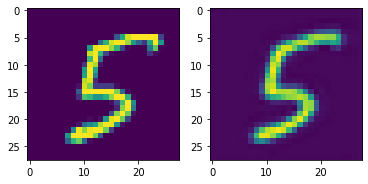

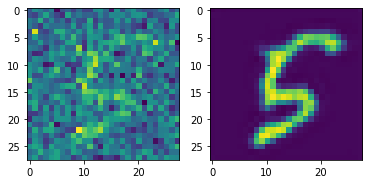

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_big, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_big, addNoise(test_data_xy[23][0]))

In [ ]:
dnauto_encoder_conv_big2 = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 2, (3,3), padding=1), # 1 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(2, 2, (3,3), padding=1) # 2 * 28 *28 to 2 * 28 *28
)


dnauto_decoder_conv_big2 = nn.Sequential(
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, C, (3,3),padding=1)# 2 * 28 *28  to 1 * 28 * 28
)

dnauto_encode_decode_conv_big2 = nn.Sequential(
    dnauto_encoder_conv_big2,
    dnauto_decoder_conv_big2
)

In [ ]:
train_network(dnauto_encode_decode_conv_big2, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,11.428350,3091.588429,3091.588429
1,1,23.119207,1119.178236,1119.178236
2,2,34.486203,993.515379,993.515379
3,3,45.965464,923.732518,923.732518
4,4,57.418148,881.175472,881.175472
5,5,68.889234,853.709717,853.709717
6,6,80.526973,834.589291,834.589291
7,7,91.859299,817.313576,817.313576
8,8,103.612610,807.371697,807.371697
9,9,115.178962,798.236076,798.236076


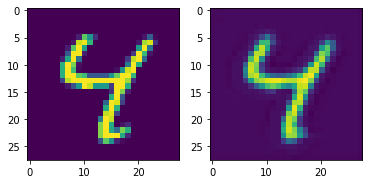

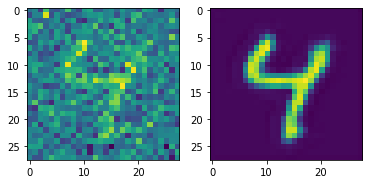

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_big2, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_big2, addNoise(test_data_xy[6][0]))

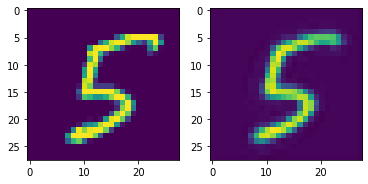

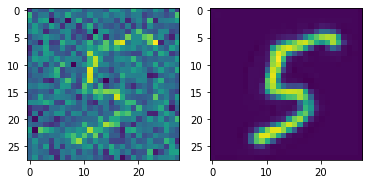

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_big2, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_big2, addNoise(test_data_xy[23][0]))

In [ ]:
dnauto_encoder_conv_convtranspose_big = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 8, (3,3), stride=2,padding=1), # 1 * 28 *28 to 8 * 14 * 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 32, (3,3), stride=2, padding=1),# 8 * 14 * 14 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, (3,3), stride=1, padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, (3,3), stride=1, padding=1) # 32 * 7 * 7 to 32 * 7 * 7
)

dnauto_decoder_conv_convtranspose_big = nn.Sequential(
    nn.ConvTranspose2d(32, 32, (3,3), padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.ConvTranspose2d(32, 32, (3,3), padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.ConvTranspose2d(32, 8, (3,3), stride=2, padding=1, output_padding=1),# 32 * 7 * 7 to 8 * 14 * 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.ConvTranspose2d(8, C, (3,3),stride=2,padding=1, output_padding=1)# 8 * 14 * 14 to 1 * 28 * 28
)

dnauto_encode_decode_conv_convtranspose_big = nn.Sequential(
    dnauto_encoder_conv_convtranspose_big,
    dnauto_decoder_conv_convtranspose_big
)

In [ ]:
train_network(dnauto_encode_decode_conv_convtranspose_big, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,13.495891,2171.864129,2171.864129
1,1,26.788758,869.027090,869.027090
2,2,40.225836,770.357684,770.357684
3,3,53.588757,726.785429,726.785429
4,4,67.106867,700.077828,700.077828
5,5,80.559197,682.112997,682.112997
6,6,94.052061,671.168883,671.168883
7,7,107.450292,657.125203,657.125203
8,8,120.906129,650.304857,650.304857
9,9,134.440995,643.130252,643.130252


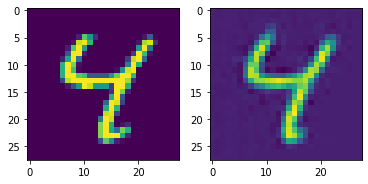

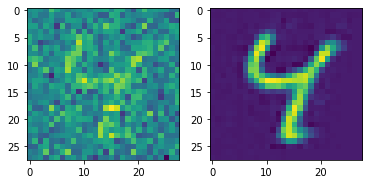

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big, addNoise(test_data_xy[6][0]))

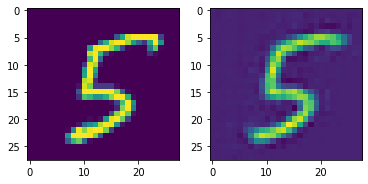

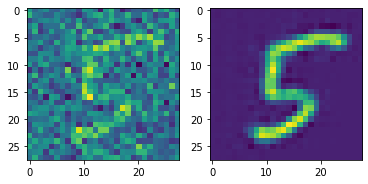

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big, addNoise(test_data_xy[23][0]))

In [ ]:
dnauto_encoder_conv_convtranspose_big2 = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 8, (3,3), stride=2,padding=1), # 1 * 28 *28 to 8 * 14 * 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(8, 32, (3,3), stride=2, padding=1),# 8 * 14 * 14 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(32, 32, (3,3), stride=1, padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(32, 32, (3,3), stride=1, padding=1) # 32 * 7 * 7 to 32 * 7 * 7
)

dnauto_decoder_conv_convtranspose_big2 = nn.Sequential(
    nn.ConvTranspose2d(32, 32, (3,3), padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.ConvTranspose2d(32, 32, (3,3), padding=1),# 32 * 7 * 7 to 32 * 7 * 7
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.ConvTranspose2d(32, 8, (3,3), stride=2, padding=1, output_padding=1),# 32 * 7 * 7 to 8 * 14 * 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.ConvTranspose2d(8, C, (3,3),stride=2,padding=1, output_padding=1)# 8 * 14 * 14 to 1 * 28 * 28
)

dnauto_encode_decode_conv_convtranspose_big2 = nn.Sequential(
    dnauto_encoder_conv_convtranspose_big2,
    dnauto_decoder_conv_convtranspose_big2
)

In [ ]:
train_network(dnauto_encode_decode_conv_convtranspose_big2, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,16.695499,1882.546380,1882.546380
1,1,33.437539,986.958656,986.958656
2,2,50.213467,876.625171,876.625171
3,3,66.995042,820.633916,820.633916
4,4,83.819465,784.017819,784.017819
5,5,100.590675,757.256411,757.256411
6,6,117.301809,735.773841,735.773841
7,7,134.232144,718.556290,718.556290
8,8,150.897872,704.954353,704.954353
9,9,167.714564,693.438727,693.438727


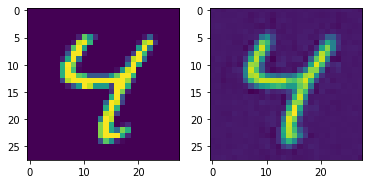

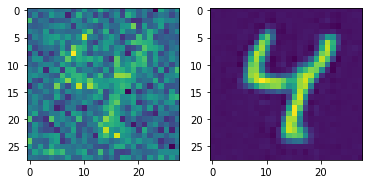

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big2, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big2, addNoise(test_data_xy[6][0]))

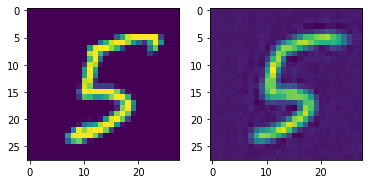

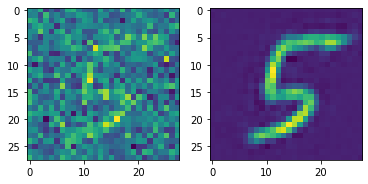

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big2, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_convtranspose_big2, addNoise(test_data_xy[23][0]))

**Convolutional Denoising Auto Encoder with Maxpool2d and ConvTranspose2d**

**MaxPool2d**

$H_{out}$=$$\frac{H_{in} + 2×padding[0]
−dilation[0]×(kernel_size[0]−1)−1}{stride[0]} + 1$$
​	


$W_{out}$ = $$\frac{W_{in} + 2 × padding[1] - dilation[1] × (kernel_size[1] - 1) - 1}{stride[1]} + 1$$

In [ ]:
dnauto_encoder_conv_max_big = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 2, (3,3), padding=1), # 1 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 8, (3,3), padding=1),# 2 * 28 *28 to 8 * 28 *28
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.MaxPool2d((2,2))# 8 * 28 *28 to 8 * 14 *14 #2 stride 2 kernel size make the C*W*H//4 or (C,W//2,H//2) shaped
    
)

dnauto_decoder_conv_max_big = nn.Sequential(
    nn.ConvTranspose2d(8, 8, (2,2), stride=2), # 8 * 14 *14 to 8 * 28 *28
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 2, (3,3), padding=1), # 8 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, C, (3,3),padding=1)# 2 * 28 *28  to 1 * 28 * 28
)

dnauto_encode_decode_conv_max_big = nn.Sequential(
    dnauto_encoder_conv_max_big,
    dnauto_decoder_conv_max_big
)

In [ ]:
train_network(dnauto_encode_decode_conv_max_big, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,8.236961,2286.913517,2286.913517
1,1,16.275362,963.836598,963.836598
2,2,24.324652,860.899627,860.899627
3,3,32.490852,817.817217,817.817217
4,4,40.669602,794.363349,794.363349
5,5,48.723525,777.632773,777.632773
6,6,56.991614,766.149960,766.149960
7,7,65.403269,755.452903,755.452903
8,8,73.710793,746.232882,746.232882
9,9,81.933544,741.706279,741.706279


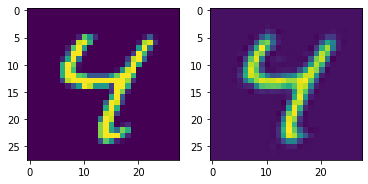

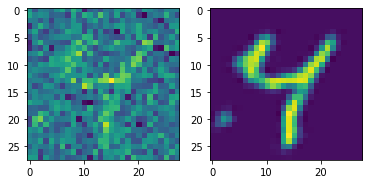

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_max_big, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_max_big, addNoise(test_data_xy[6][0]))

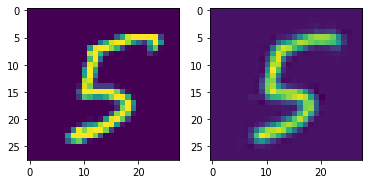

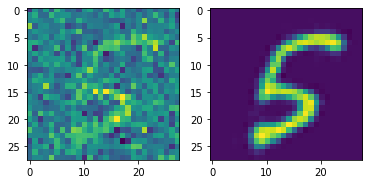

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_max_big, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_max_big, addNoise(test_data_xy[23][0]))

In [ ]:
dnauto_encoder_conv_max_big2 = nn.Sequential(
    AdditiveGausNoise(),
    View(-1,1,28,28),
    nn.Conv2d(C, 2, (3,3), padding=1), # 1 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(2, 2, (3,3), padding=1),# 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.Conv2d(2, 8, (3,3), padding=1),# 2 * 28 *28 to 8 * 28 *28
    nn.BatchNorm2d(8),
    nn.ReLU(),
    AdditiveGausNoise(),
    nn.MaxPool2d((2,2))# 8 * 28 *28 to 8 * 14 *14 #2 stride 2 kernel size make the C*W*H//4 or (C,W//2,H//2) shaped
    
)

dnauto_decoder_conv_max_big2 = nn.Sequential(
    nn.ConvTranspose2d(8, 8, (2,2), stride=2), # 8 * 14 *14 to 8 * 28 *28
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 2, (3,3), padding=1), # 8 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, 2, (3,3), padding=1), # 2 * 28 *28 to 2 * 28 *28
    nn.BatchNorm2d(2),
    nn.ReLU(),
    nn.Conv2d(2, C, (3,3),padding=1)# 2 * 28 *28  to 1 * 28 * 28
)

dnauto_encode_decode_conv_max_big2 = nn.Sequential(
    dnauto_encoder_conv_max_big2,
    dnauto_decoder_conv_max_big2
)

In [ ]:
train_network(dnauto_encode_decode_conv_max_big2, mse_loss, train_loader, val_loader=test_loader, epochs=10, device=device)

,epoch,total time,train loss,val loss
0,0,14.660124,848.144233,848.144233
1,1,29.187089,835.510857,835.510857
2,2,43.869257,825.044803,825.044803
3,3,58.410566,817.356816,817.356816
4,4,73.075689,809.233976,809.233976
5,5,87.532853,804.677285,804.677285
6,6,102.167666,799.887407,799.887407
7,7,116.629644,795.173471,795.173471
8,8,131.277437,793.407632,793.407632
9,9,145.773162,787.723706,787.723706


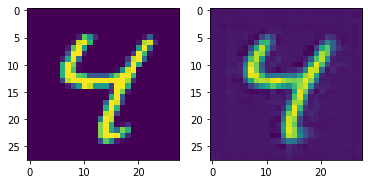

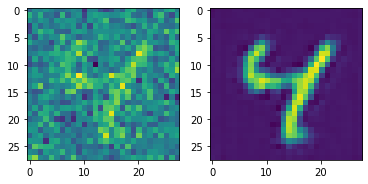

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_max_big2, test_data_xy[6][0])
showEncodeDecode(dnauto_encode_decode_conv_max_big2, addNoise(test_data_xy[6][0]))

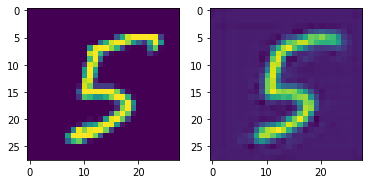

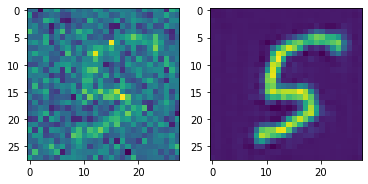

In [ ]:
showEncodeDecode(dnauto_encode_decode_conv_max_big2, test_data_xy[23][0])
showEncodeDecode(dnauto_encode_decode_conv_max_big2, addNoise(test_data_xy[23][0]))

**Probelm 6:**

***Denoising process on CIFAR-10 and CelebA-HQ DDPM***


In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import math


In [ ]:
# convert data to a normalized torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)



num_workers = 0
noise_factor=0.1
batch_size = 32

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
use_cuda = torch.cuda.is_available()

print(use_cuda)

True


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
   plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
0

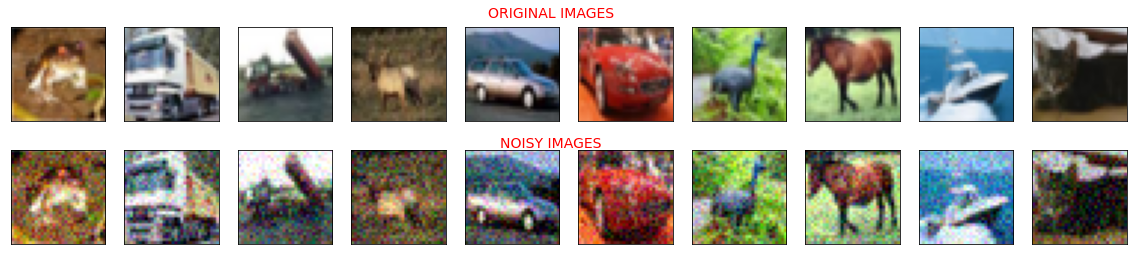

In [ ]:
showOrigDec(images,noisy_imgs)

# Denoising

We can create the noisy images ourselves by adding Gaussian noise to the training images, then clipping the values to be between 0 and 1.

OUR ARCHITECTURE  consists of -
1.   15 Encoding Layers
2.  15 Decoding Layers
3. Symmetric Skip Connections
4. Relu and Batch Normalization after each layer





In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class REDNet30(nn.Module):
    def __init__(self, num_layers=15, num_features=64):
        super(REDNet30, self).__init__()
        self.num_layers = num_layers

        conv_layers = []
        deconv_layers = []

        conv_layers.append(nn.Sequential(nn.Conv2d(3, num_features, kernel_size=3, stride=2, padding=1),
                                         nn.ReLU(inplace=True),
                                         nn.BatchNorm2d(num_features)))
        for i in range(num_layers - 1):
            conv_layers.append(nn.Sequential(nn.Conv2d(num_features, num_features, kernel_size=3, padding=1),
                                             nn.ReLU(inplace=True),
                                             nn.BatchNorm2d(num_features)))

        for i in range(num_layers - 1):
            deconv_layers.append(nn.Sequential(nn.ConvTranspose2d(num_features, num_features, kernel_size=3, padding=1),
                                               nn.ReLU(inplace=True),
                                               nn.BatchNorm2d(num_features)))
        deconv_layers.append(nn.ConvTranspose2d(num_features, 3, kernel_size=3, stride=2, padding=1, output_padding=1))

        self.conv_layers = nn.Sequential(*conv_layers)
        self.deconv_layers = nn.Sequential(*deconv_layers)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x

        conv_feats = []
        for i in range(self.num_layers):
            x = self.conv_layers[i](x)
            if (i + 1) % 2 == 0 and len(conv_feats) < math.ceil(self.num_layers / 2) - 1:
                conv_feats.append(x)

        conv_feats_idx = 0
        for i in range(self.num_layers):
            x = self.deconv_layers[i](x)
            if (i + 1 + self.num_layers) % 2 == 0 and conv_feats_idx < len(conv_feats):
                conv_feat = conv_feats[-(conv_feats_idx + 1)]
                conv_feats_idx += 1
                x = x + conv_feat
                x = self.relu(x)

        x += residual
        x = self.relu(x)

        return x

# initialize the NN
model = REDNet30()
model.cuda()
print(model)

REDNet30(
  (conv_layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3,

In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print(type(train_loader))
for data in train_loader:
    images, target = data
    print(target)
    print(images.shape)
    break

<class 'torch.utils.data.dataloader.DataLoader'>
tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9])
torch.Size([32, 3, 32, 32])


In [ ]:
# number of epochs to train the model
n_epochs = 40


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
                
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs = model(noisy_imgs.cuda())
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images.cuda())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

In [ ]:
torch.save(model,"denoise_batch.pt")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type REDNet30. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
torch.load("denoise_batch.pt")

REDNet30(
  (conv_layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3,

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# get sample outputs
output = model(noisy_imgs.cuda())



# output is resized into a batch of iages
output = output.view(batch_size, 3, 32, 32)
# use detach when it's an output that requires_grad
output = output.detach().cpu()



## **COMPARING IMAGES**

In [ ]:


def showOrigNoiseOut(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


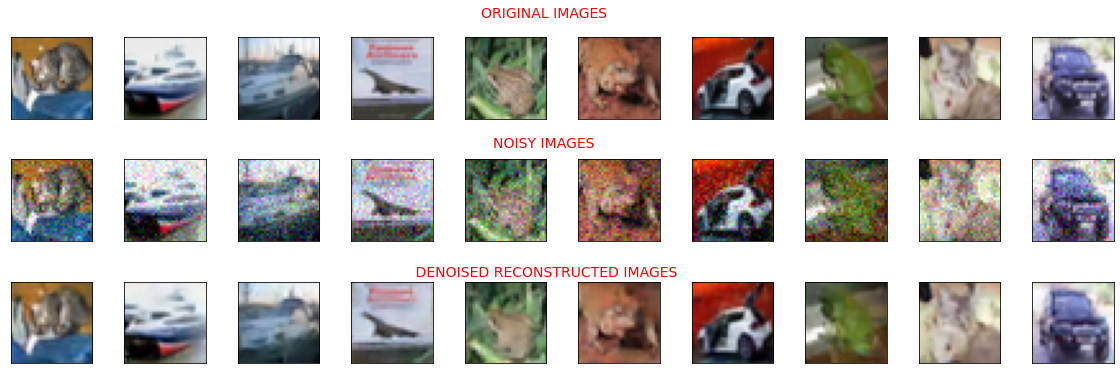

In [ ]:
showOrigNoiseOut(images, noisy_imgs, output)

### EVALUATION 

In [ ]:
from skimage import metrics

avg_psnr=0
avg_ssim=0
test_size=0
for data in test_loader:
    images= data[0]
    noisy_imgs = images + noise_factor * torch.randn(*images.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    output = model(noisy_imgs.cuda())
    output = output.view(len(images), 3, 32, 32)
    output = output.detach().cpu()
    batch_avg_psnr=0
    batch_avg_ssim=0
    for i in range(len(images)):
        org=np.transpose(images[i], (1, 2, 0)).numpy()
        denoise=np.transpose(output[i], (1, 2, 0)).numpy()
        batch_avg_psnr+=metrics.peak_signal_noise_ratio(org,denoise)
        batch_avg_ssim+=metrics.structural_similarity(org,denoise,multichannel=True)
    avg_psnr+=batch_avg_psnr
    avg_ssim+=batch_avg_ssim
    test_size+=len(images)

print("On Test data of {} examples:\nAverage PSNR:{:.3f} \nAverage SSIM: {:.3f}".format(test_size,avg_psnr/test_size,avg_ssim/test_size))

On Test data of 10000 examples:
Average PSNR:28.254 
Average SSIM: 0.938


**Problem 6:**

***Denoising process on CIFAR-10 and CelebA-HQ DDIM***

In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms


In [ ]:
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),])
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)



num_workers = 0

batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
use_cuda = torch.cuda.is_available()

print(use_cuda)

True


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    #img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
noise_factor=0.1
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# convert images to numpy for display

noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
images = images.numpy() 
noisy_imgs=noisy_imgs.numpy()
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display noisy
        ax = plt.subplot(2, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.5, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.3 )
        
    plt.show()

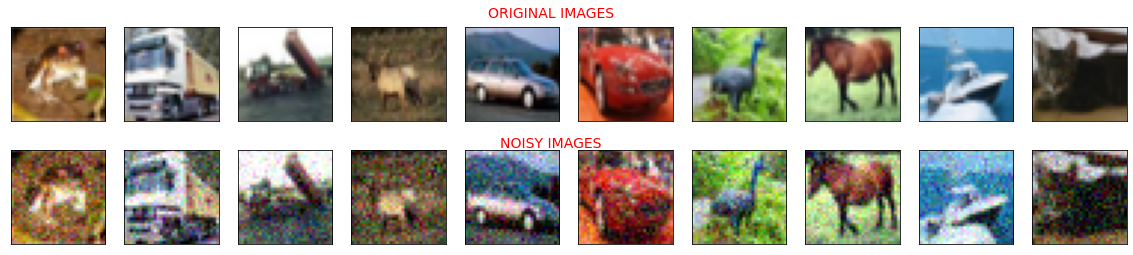

In [ ]:
showOrigDec(images,noisy_imgs)

# Denoising

As I've mentioned before, autoencoders like the ones you've built so far aren't too useful in practive. However, they can be used to denoise images quite successfully just by training the network on noisy images. We can create the noisy images ourselves by adding Gaussian noise to the training images, then clipping the values to be between 0 and 1.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvDenoiser(nn.Module):
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 3 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(64, 16, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(16, 64, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(64, 3, 2, stride=2)

    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
                
        return x

# initialize the NN
model = ConvDenoiser()
model=model.cuda()
print(model)

ConvDenoiser(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(16, 64, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(64, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print(type(train_loader))
for data in train_loader:
  images, target = data
  print(target)
  print(images.shape)
  break

<class 'torch.utils.data.dataloader.DataLoader'>
tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6])
torch.Size([20, 3, 32, 32])


In [ ]:
# number of epochs to train the model
n_epochs = 40

# for adding noise to images
noise_factor=0.1

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs=noisy_imgs.cuda()
        images=images.cuda()
                
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs = model(noisy_imgs)
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.158163
Epoch: 2 	Training Loss: 0.099382
Epoch: 3 	Training Loss: 0.090625
Epoch: 4 	Training Loss: 0.086315
Epoch: 5 	Training Loss: 0.083779
Epoch: 6 	Training Loss: 0.082115
Epoch: 7 	Training Loss: 0.080881
Epoch: 8 	Training Loss: 0.080016
Epoch: 9 	Training Loss: 0.079343
Epoch: 10 	Training Loss: 0.078811
Epoch: 11 	Training Loss: 0.078279
Epoch: 12 	Training Loss: 0.077877
Epoch: 13 	Training Loss: 0.077516
Epoch: 14 	Training Loss: 0.077156
Epoch: 15 	Training Loss: 0.076803
Epoch: 16 	Training Loss: 0.076535
Epoch: 17 	Training Loss: 0.076213
Epoch: 18 	Training Loss: 0.075922
Epoch: 19 	Training Loss: 0.075683
Epoch: 20 	Training Loss: 0.075345
Epoch: 21 	Training Loss: 0.075111
Epoch: 22 	Training Loss: 0.074885
Epoch: 23 	Training Loss: 0.074693
Epoch: 24 	Training Loss: 0.074520
Epoch: 25 	Training Loss: 0.074316
Epoch: 26 	Training Loss: 0.074188
Epoch: 27 	Training Loss: 0.074009
Epoch: 28 	Training Loss: 0.073878
Epoch: 29 	Training Loss: 0.0

In [ ]:
PATH='/content/check.pt'
torch.save(model.state_dict(), PATH)

In [ ]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 3, 3])
conv1.bias 	 torch.Size([64])
conv2.weight 	 torch.Size([16, 64, 3, 3])
conv2.bias 	 torch.Size([16])
t_conv1.weight 	 torch.Size([16, 64, 2, 2])
t_conv1.bias 	 torch.Size([64])
t_conv2.weight 	 torch.Size([64, 3, 2, 2])
t_conv2.bias 	 torch.Size([3])


In [ ]:
model.load_state_dict(torch.load('check.pt'))

<All keys matched successfully>

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# get sample outputs
output = model(noisy_imgs.cuda())



# output is resized into a batch of iages
output = output.view(batch_size, 3, 32, 32)
# use detach when it's an output that requires_grad
output = output.detach().cpu()



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


## RESULTS

In [ ]:


def showOrigNoiseOut(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

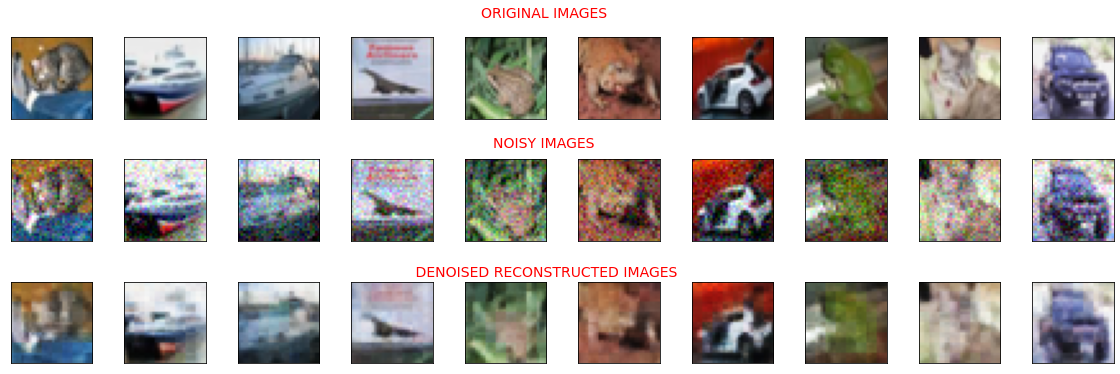

In [ ]:
showOrigNoiseOut(images, noisy_imgs, output)

### EVALUATION

In [ ]:
from skimage import metrics

avg_psnr=0
avg_ssim=0
test_size=0
for data in test_loader:
    images= data[0]
    noisy_imgs = images + noise_factor * torch.randn(*images.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    output = model(noisy_imgs.cuda())
    output = output.view(len(images), 3, 32, 32)
    output = output.detach().cpu()
    batch_avg_psnr=0
    batch_avg_ssim=0
    for i in range(len(images)):
        org=np.transpose(images[i], (1, 2, 0)).numpy()
        denoise=np.transpose(output[i], (1, 2, 0)).numpy()
        batch_avg_psnr+=metrics.peak_signal_noise_ratio(org,denoise)
        batch_avg_ssim+=metrics.structural_similarity(org,denoise,multichannel=True)
    avg_psnr+=batch_avg_psnr
    avg_ssim+=batch_avg_ssim
    test_size+=len(images)

print("On Test data of {} examples:\nAverage PSNR:{:.3f} \nAverage SSIM: {:.3f}".format(test_size,avg_psnr/test_size,avg_ssim/test_size))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


On Test data of 10000 examples:
Average PSNR:24.830 
Average SSIM: 0.868


**Problem 6**

***Denoising process on CIFAR-10 and CelebA-HQ FASTDPM***


In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# convert data to a normalized torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)



num_workers = 0
noise_factor=0.1
batch_size = 32

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
use_cuda = torch.cuda.is_available()

print(use_cuda)

True


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# convert images to numpy for display

noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
images = images.numpy() 
noisy_imgs=noisy_imgs.numpy()
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display noisy
        ax = plt.subplot(2, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.5, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.3 )
        
    plt.show()

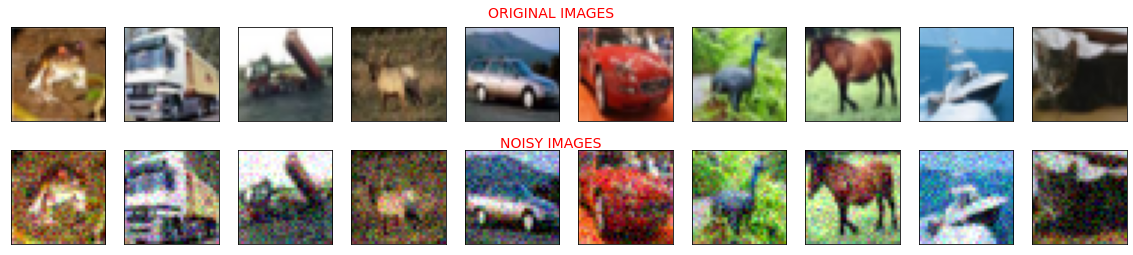

In [ ]:
showOrigDec(images,noisy_imgs)

# Denoising

As I've mentioned before, autoencoders like the ones you've built so far aren't too useful in practive. However, they can be used to denoise images quite successfully just by training the network on noisy images. We can create the noisy images ourselves by adding Gaussian noise to the training images, then clipping the values to be between 0 and 1.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class DnCNN(nn.Module):
    def __init__(self, num_layers=17, num_features=64):
        super(DnCNN, self).__init__()
        layers = [nn.Sequential(nn.Conv2d(3, num_features, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(inplace=True))]
        for i in range(num_layers - 2):
            layers.append(nn.Sequential(nn.Conv2d(num_features, num_features, kernel_size=3, padding=1),
                                        nn.BatchNorm2d(num_features),
                                        nn.ReLU(inplace=True)))
        layers.append(nn.Conv2d(num_features, 3, kernel_size=3, padding=1))
        self.layers = nn.Sequential(*layers)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, inputs):
        y = inputs
        residual = self.layers(y)
        return y - residual

# initialize the NN
model = DnCNN()
model.cuda()
print(model)

DnCNN(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print(type(train_loader))
for data in train_loader:
    images, target = data
    print(target)
    print(images.shape)
    break

<class 'torch.utils.data.dataloader.DataLoader'>
tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9])
torch.Size([32, 3, 32, 32])


In [ ]:
# number of epochs to train the model
n_epochs = 40


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
                
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs = model(noisy_imgs.cuda())
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images.cuda())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.343218
Epoch: 2 	Training Loss: 0.099999
Epoch: 3 	Training Loss: 0.072915
Epoch: 4 	Training Loss: 0.063571
Epoch: 5 	Training Loss: 0.067289
Epoch: 6 	Training Loss: 0.055220
Epoch: 7 	Training Loss: 0.052529
Epoch: 8 	Training Loss: 0.051614
Epoch: 9 	Training Loss: 0.048445
Epoch: 10 	Training Loss: 0.047340
Epoch: 11 	Training Loss: 0.046588
Epoch: 12 	Training Loss: 0.046038
Epoch: 13 	Training Loss: 0.045356
Epoch: 14 	Training Loss: 0.044983
Epoch: 15 	Training Loss: 0.044515
Epoch: 16 	Training Loss: 0.049190
Epoch: 17 	Training Loss: 0.044731
Epoch: 18 	Training Loss: 0.043902
Epoch: 19 	Training Loss: 0.043747
Epoch: 20 	Training Loss: 0.043879
Epoch: 21 	Training Loss: 0.043564
Epoch: 22 	Training Loss: 0.043244
Epoch: 23 	Training Loss: 0.057483
Epoch: 24 	Training Loss: 0.049283
Epoch: 25 	Training Loss: 0.045857
Epoch: 26 	Training Loss: 0.044779
Epoch: 27 	Training Loss: 0.044101
Epoch: 28 	Training Loss: 0.043668
Epoch: 29 	Training Loss: 0.0

In [ ]:
torch.save(model,"denoise_DnCNN.pt")

C:\Users\sjasu\anaconda3\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type DnCNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
model.load_state_dict(torch.load('dcnn.pt'))

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# get sample outputs
output = model(noisy_imgs.cuda())



# output is resized into a batch of iages
output = output.view(batch_size, 3, 32, 32)
# use detach when it's an output that requires_grad
output = output.detach().cpu()



## **Image Comparison**

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

def showOrigNoiseOut(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="b")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="b")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="b")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


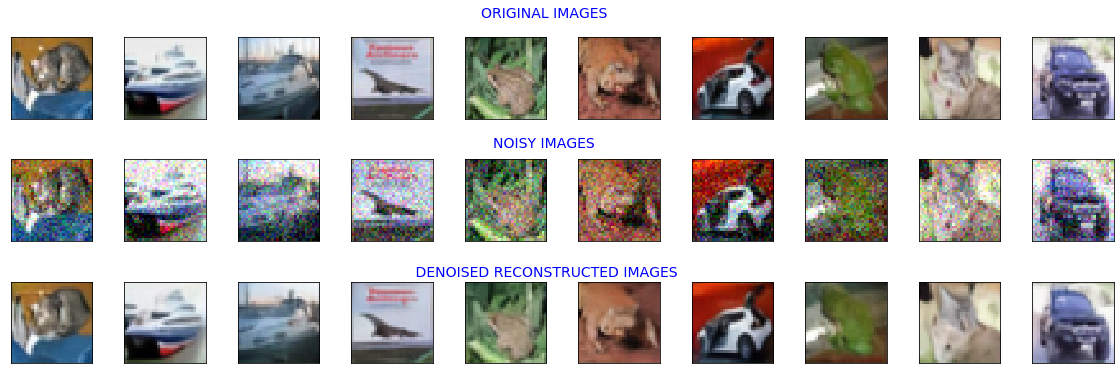

In [ ]:
showOrigNoiseOut(images, noisy_imgs, output)

In [ ]:
from skimage import metrics

avg_psnr=0
avg_ssim=0
test_size=0
for data in test_loader:
    images= data[0]
    noisy_imgs = images + noise_factor * torch.randn(*images.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    output = model(noisy_imgs.cuda())
    output = output.view(len(images), 3, 32, 32)
    output = output.detach().cpu()
    batch_avg_psnr=0
    batch_avg_ssim=0
    for i in range(len(images)):
        org=np.transpose(images[i], (1, 2, 0)).numpy()
        denoise=np.transpose(output[i], (1, 2, 0)).numpy()
        batch_avg_psnr+=metrics.peak_signal_noise_ratio(org,denoise)
        batch_avg_ssim+=metrics.structural_similarity(org,denoise,multichannel=True)
    avg_psnr+=batch_avg_psnr
    avg_ssim+=batch_avg_ssim
    test_size+=len(images)

print("On Test data of {} examples:\nAverage PSNR:{:.3f} \nAverage SSIM: {:.3f}".format(test_size,avg_psnr/test_size,avg_ssim/test_size))

On Test data of 10000 examples:
Average PSNR:28.992 
Average SSIM: 0.947


**PROBLEM 8**
YES, diffusion models have been able to produce realistic handwritten text. Handwriting data can be stored in online or offline format. Online data is rendered as a sequence of pen strokes, and offline data is stored directly as an image. Online temporal data is easier to work with due to its lower dimensionality, but is harder to collect since each stroke must be recorded during writing. Each sample of handwriting data is associated with a text sequence label describing the content of the handwritten text. Each handwritten sample can also be associated with another example of handwriting from the same writer, which provides information about the style of the writer.


According to  research paper (http://ceur-ws.org/Vol-2864/paper44.pdf) they have implemented some models namely Support Vector Machine Classifier,
KNN Classifier, Random Forest Classifier, Multilayer Perceptron Classifier, Multi-Layer Perceptron
and Convolutional Neural Network for handwritten digit recognition using MNIST datasets. It
compared them based on their working accuracy.
1. After a simple setup, all these algorithms demonstrated almost the same accuracy of
handwritten digit recognition, differing within +1%.
2. It was found that CNN gave the most accurate results for handwritten digit recognition, but the
only drawback is that it took an exponential amount of computing time. This will be in mitigated in future 
3. To improve the recognition accuracy, it is necessary to perform two additional stages of image
preprocessing and dataset transformation:
•	after highlighting the area of interest contour exactly along the boundaries of the digit, this
part of the image is centered in the square area;
•	the border of the image is added with a width of 15-25% of the size of the square area;
•	converting images from the MNIST dataset to black and white form.
After building recognition models using all the algorithms mentioned above, the recognition
accuracy of all handwritten digits on the test program turned out to be in the range of 98-100% (one
or no errors per 50 drawn digits). A similar result was obtained when recognizing the generated sets
of digits with different shapes – the recognition accuracy reaches the recognition accuracy on the
MNIST test sample. For industrial images regardless of the used neural network version, the
recognition accuracy was 96-98%.

